In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
import xgboost as xgb


In [58]:
df=pd.read_csv('data/lungcancer.csv')

In [60]:
df.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [65]:
df.info()
#Since we can see there are no missing values we are good to proceed

#But as there are two caegorical features of GENDER and of LUNG_CANCER we need to fix it 

#Here are our 2 columns for uncderstanding
# 	GENDER	AGE	SMOKING	YELLOW_FINGERS	ANXIETY	PEER_PRESSURE	CHRONIC DISEASE	FATIGUE	ALLERGY	WHEEZING	ALCOHOL CONSUMING	COUGHING	SHORTNESS OF BREATH	SWALLOWING DIFFICULTY	CHEST PAIN	LUNG_CANCER
# 0	M	69	1	2	2	1	1	2	1	2	2	2	2	2	2	YES
# 1	M	74	2	1	1	1	2	2	2	1	1	1	2	2	2	YES
# 2	F	59	1	1	1	2	1	2	1	2	1	2	2	1	2	NO
# 3	M	63	2	2	2	1	1	1	1	1	2	1	1	2	2	NO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [61]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [63]:
label_encoder = LabelEncoder()

# Encode 'GENDER' using LabelEncoder
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
df.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [71]:
#We can see the vales of Males("M") are changed to 1 and that of Females ("F") are changed to 0
#The values of the cancer patients are changed to 1 and those not having lung cancer were changed to 0
#Now we are all set to go for our model training

In [81]:
#Define X and y
X= df.drop(columns=['LUNG_CANCER'])
y=df['LUNG_CANCER']


In [82]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
#Lets scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [93]:
#Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}
results=[]

In [94]:
#Evaluate model
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })
    
    print(f"Results for {name}:")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(classification_report(y_test, y_test_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n")
    
    return model


In [95]:
best_model = None
best_roc_auc = 0

for name, model in models.items():
    trained_model = evaluate_model(name, model)
    
    # Compare ROC-AUC to select the best model
    if results[-1]['ROC-AUC'] > best_roc_auc:
        best_roc_auc = results[-1]['ROC-AUC']
        best_model = trained_model


Results for Logistic Regression:
Train Accuracy: 0.9433198380566802
Test Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62

Confusion Matrix:
[[ 5  3]
 [ 3 51]]

Results for K-Nearest Neighbors:
Train Accuracy: 0.9190283400809717
Test Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.91      0.94      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.66      0.68        62
weighted avg       0.86      0.87      0.86        62

Confusion Matrix:
[[ 3  5]
 [ 3 51]]

Results for Support Vector Classifier:
Train Accuracy: 0.947368421

In [96]:
results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)

Model Comparison:
                        Model  Train Accuracy  Test Accuracy  F1 Score  \
0        Logistic Regression        0.943320       0.903226  0.944444   
1        K-Nearest Neighbors        0.919028       0.870968  0.927273   
2  Support Vector Classifier        0.947368       0.854839  0.918919   
3              Decision Tree        1.000000       0.887097  0.932039   
4              Random Forest        1.000000       0.919355  0.953271   
5          Gradient Boosting        0.991903       0.854839  0.915888   
6                   AdaBoost        0.939271       0.903226  0.945455   
7                    XGBoost        1.000000       0.870968  0.924528   

    ROC-AUC  
0  0.946759  
1  0.896991  
2  0.930556  
3  0.881944  
4  0.953704  
5  0.937500  
6  0.936343  
7  0.923611  


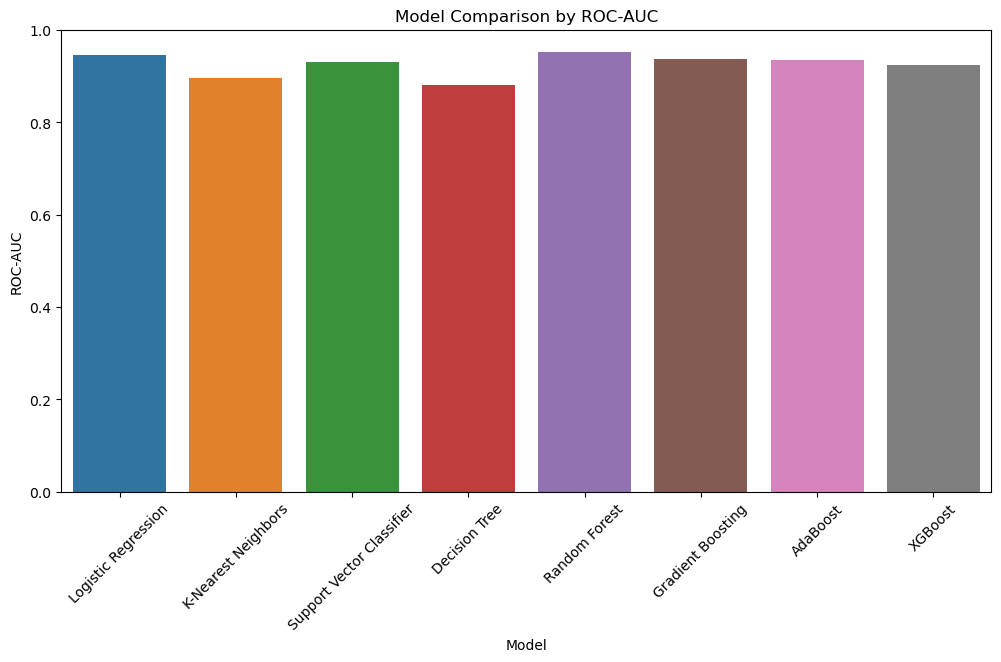

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROC-AUC', data=results_df)
plt.title('Model Comparison by ROC-AUC')
plt.ylabel('ROC-AUC')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [98]:
#Which model should we select
#On the basis of best train and test accuracy- Random Forest

Feature Importances:
                   Feature  Importance
1                     AGE    0.212037
8                ALLERGY     0.090079
10      ALCOHOL CONSUMING    0.079576
5           PEER_PRESSURE    0.073383
3          YELLOW_FINGERS    0.069758
6         CHRONIC DISEASE    0.059096
7                FATIGUE     0.056945
11               COUGHING    0.055679
9                WHEEZING    0.050221
12    SHORTNESS OF BREATH    0.048491
14             CHEST PAIN    0.044399
4                 ANXIETY    0.043972
0                  GENDER    0.041727
13  SWALLOWING DIFFICULTY    0.038713
2                 SMOKING    0.035924


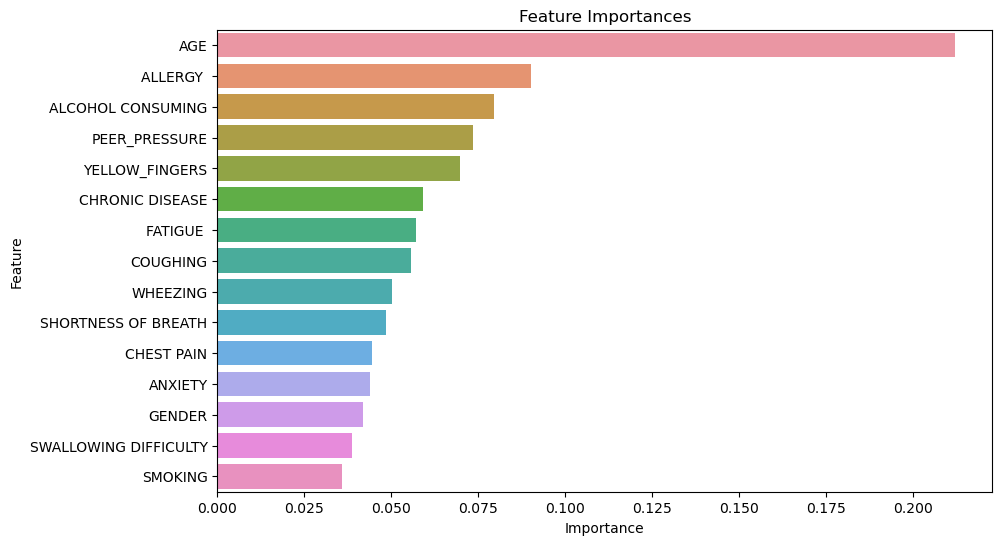

In [110]:
if isinstance(best_model, (RandomForestClassifier, GradientBoostingClassifier, xgb.XGBClassifier)):
    feature_importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print("Feature Importances:\n", feature_importance_df)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importances')
    plt.show()
    
